# Regression in Machine Learning

Regression is a machine learning technique which helps in finding the correlation between variables and enables us to predict the continuous output variable based on the one or more predictor variables.

# Types of Regression

* Simple Linear Regression

* Polynomial Regression

* Ridge Regression

* Lasso Regression

* Logistic Regression

* Support Vector Regression

* Decision Tree Regression

* Random Forest Regression


## Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.

This is one of the most common and interesting type of Regression technique. Here we predict a target variable Y based on the input variable X. A linear relationship should exist between target variable and predictor and so comes the name Linear Regression



### Linear Regression is used for?
Linear regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable.


### Formula 

A linear regression line has an equation of the form **Y = a + bX**, where **X** is the explanatory variable and **Y** is the dependent variable. The slope of the line is **b**, and **a** is the intercept (the value of y when x = 0).

### Scikit-learn 

Scikit-learn is a software machine learning library for the Python. It features various classification, regression and clustering algorithms.



### Importoing Libraries

In [17]:
# Common imports
import numpy as np
import pandas as pd
import os

# To plot graphs
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

* " %matplotlib inline " helps in returning output plots without needing to write plt.show() code everytime after each plot!

### Loading Dataset

In [35]:
#Path for train datset
dataset_path = os.path.join("dataset")

#Function to load and return dataset path
def load_housing_data(dataset_housing=dataset_path):
    csv_path = os.path.join(dataset_housing, "House_pricing_train.csv")
    return pd.read_csv(csv_path)

#Reading Dataset and displaying head
df_train = load_housing_data()
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


* " .head() " returns first five observations of the dataset

In [36]:
#Path for test datset
dataset_path = os.path.join("dataset")

#Function to load and return dataset path
def load_housing_data(dataset_housing=dataset_path):
    csv_path = os.path.join(dataset_housing, "House_pricing_test.csv")
    return pd.read_csv(csv_path)

#Reading Dataset and displaying head
df_test = load_housing_data()
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Plotting Histogram

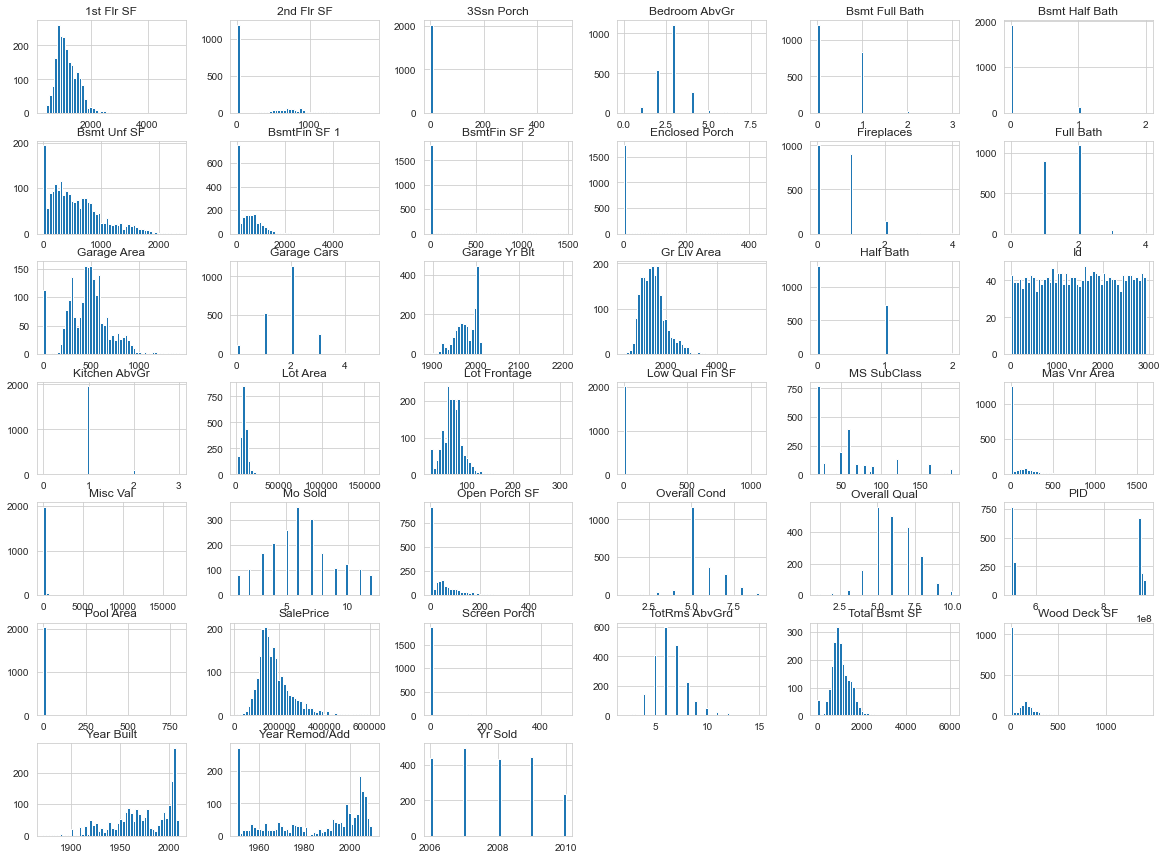

In [37]:
#PLotting Histograms for each column in housing dataset 

%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

### Data Insights

In [38]:
#CHecking Shape
df_train.shape

(2051, 81)

* Dataset comprises of 2051 observations and 81 chracteriestics
* Out of which one is dependent variable and rest are independent variables - physicochemical characteristics

In [39]:
#test dataset 
df_test.shape 

(878, 80)

In [40]:
#Label of each Column is observed
df_train.columns.values

array(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
  

In [41]:
#Housing dataset info 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

* Data has object, float and integer values
* No variable column has null/missing values

In [42]:
#Hosuing dataset describe check
# describe() method. Pandas describe() is used to view some basic statistical details like percentile, mean, std etc..

df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Understanding Target variable

In [43]:
df_train.SalePrice.unique() 

array([130500, 220000, 109000, 174000, 138500, 190000, 140000, 142000,
       112500, 135000,  85400, 183600, 131000, 200000, 193000, 173500,
        98000, 139000, 143500, 215200, 129000, 278000, 344133, 185000,
       145000, 187500, 198000, 119600, 122900, 230000, 270000, 125000,
       297000, 113500, 127000, 175500, 146000, 147500, 465000, 165500,
       131500, 129500, 257076, 117000, 149000, 128000, 155000, 166000,
       250000,  76000, 158000, 149500, 121000, 136000, 173000, 290000,
       303477, 122250, 153000, 147000, 148500, 130000, 372000, 213490,
       308030, 300000, 159500, 137500, 232000,  93850, 105000,  68500,
       154300, 129850, 114000, 501837, 153900, 160500, 310090, 184900,
       132000, 163000, 183000, 211000, 184000, 118858, 180500, 148000,
       124000, 277500, 350000, 387000,  86000,  44000, 215000, 146500,
       165000, 252000, 150000, 139900, 162900, 160000,  63900, 149900,
       231500, 108000, 120000, 128500, 115000, 110000, 178000, 199500,
      

In [44]:
#Value counts
df_train.SalePrice.value_counts()

130000    25
140000    22
145000    20
135000    19
160000    16
          ..
289000     1
129250     1
76000      1
206900     1
169985     1
Name: SalePrice, Length: 828, dtype: int64

* This tells us vote count of each saleprice score in descending order.
* "SalePrice" has most values concentrated in the categories 130000, 14000 and 145000.
* Only a few observations made for the categories 76000,169985..

#### sqrt() function:
An inbuilt function in Python programming language that returns the square root of any number. 

In [45]:
# Calculate max number of features for training 
np.sqrt(df_train.shape[0])

45.28796749689701

Inorder to Overfit model, make sure to keep max no.of features to around 45, check the features of dataset using sqrt() function by shape of dataset

## Exploratory Data Analysis Starts

The purpose of exploratory data analysis is to: Check for missing data and other mistakes. Gain maximum insight into the data set and its underlying structure. Uncover a parsimonious model, one which explains the data with a minimum number of predictor variables.

### To check missing values

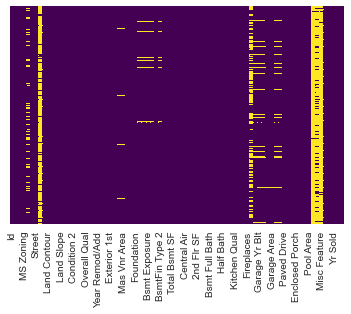

In [46]:
#To Check the missingvalues using heatmap
sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### To check correlation

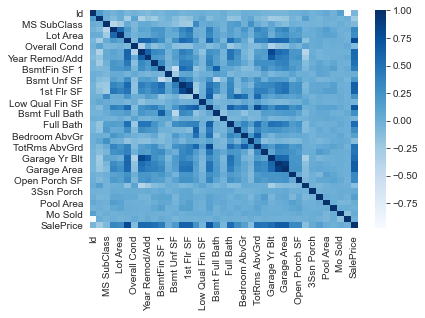

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train.corr(),cmap='Blues',annot=False) 

* Dark shades represents positive correlation while lighter shades represents negative correlation.
* If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

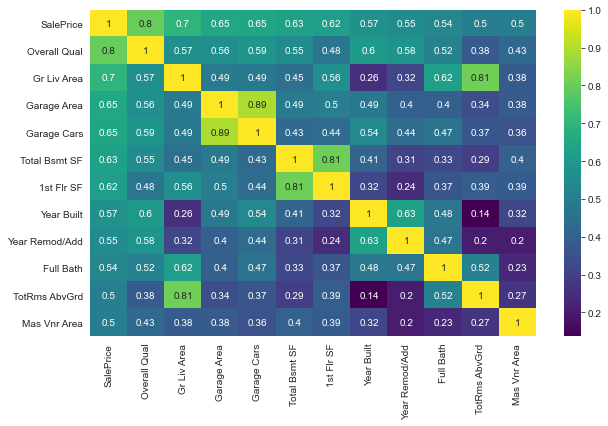

In [83]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = df_train[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

* Here we can infer that "Mas Vnr Area" has strong positive correlation with "Gr Liv Area " whereas it has strong negative correlation with "Garage Yr Blt".
* Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you're applying Linear Regression model to the dataset.

In [48]:
#Function to Check nulls

def check_for_nulls(df):
    '''
    Iterates over columns in the data set
    Creates a list of columns with missing values
    '''
    missing_list = []

    for column in df.columns:
        if df[column].isna().sum() > 0:
            missing_list.append(column)

    return missing_list

In [49]:
#Function to check missing values
def show_na_sum(df, column):
    '''
    Shows a count of missing values in a specific column
    '''
    return df[column].isna().sum()

In [50]:
#Function to fix missing points
def fix_na(df, column, value):
    '''
    Fill missing data points with a specific function
    '''
    df[column] = df[column].fillna(value)

In [51]:
#Function to convert column name to new datatype
def change_dtype(df, column, map_fxn):
    '''
    Convert a column to a new data type
    '''
    df[column] = df[column].map(map_fxn)

### Check for Null/Missing Values

In [52]:
# Training
check_for_nulls(df_train)

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [53]:
# Testing 
check_for_nulls(df_test)

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Electrical',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

* Above are the names for columns that contain missing data. These missing values will be cleaned below.

In [76]:
#Train data 
show_na_sum(df_train, 'Lot Frontage')
show_na_sum(df_train, 'Alley')
show_na_sum(df_train, 'Mas Vnr Type')
show_na_sum(df_train, 'Mas Vnr Area')
show_na_sum(df_train, 'Bsmt Qual')
show_na_sum(df_train, 'Bsmt Cond')
show_na_sum(df_train, 'Bsmt Exposure')
show_na_sum(df_train, 'BsmtFin Type 1')
show_na_sum(df_train, 'BsmtFin Type 2')
show_na_sum(df_train, 'Fireplace Qu')
show_na_sum(df_train, 'Garage Type')
show_na_sum(df_train, 'Garage Yr Blt')
show_na_sum(df_train, 'Garage Finish')
show_na_sum(df_train, 'Garage Qual')
show_na_sum(df_train, 'Garage Cond')
show_na_sum(df_train, 'Pool QC')
show_na_sum(df_train, 'Fence')
show_na_sum(df_train, 'Misc Feature')
show_na_sum(df_train, 'BsmtFin SF 1')
show_na_sum(df_train, 'BsmtFin SF 2')
show_na_sum(df_train, 'Bsmt Unf SF')
show_na_sum(df_train, 'Total Bsmt SF')
show_na_sum(df_train, ['Garage Cars', 'Garage Area'])

#Test Data
show_na_sum(df_test, 'Electrical')

#Train data
df_train[df_train['Lot Frontage'].isna()]['MS Zoning'].value_counts()
df_train['Alley'].value_counts()
df_train['Mas Vnr Type'].value_counts()
df_train[df_train['Mas Vnr Type'] == 'None']['Mas Vnr Area']
df_train['Bsmt Qual'].value_counts()
df_train['Bsmt Cond'].value_counts()
df_train['Bsmt Exposure'].value_counts()
df_train['BsmtFin Type 1'].value_counts()
df_train['BsmtFin Type 2'].value_counts()
df_train[df_train['Fireplaces']==0]['Fireplace Qu'].count()
df_train[df_train['Garage Area']==0]['Id'].count()
df_train['Garage Type'].value_counts()
mask1 = df_train['Garage Area'] != 0
mask2 = df_train['Garage Yr Blt'].isna()

df_train[mask1 & mask2]

df_train['Pool QC'].value_counts()
df_train[df_train['Pool Area'] == 0]['Id'].count()
df_train[df_train['Pool Area'] == 0].count()['Id']/df_train['Pool Area'].count()
df_train['Fence'].value_counts()
df_train['Misc Feature'].value_counts()
df_train[df_train['BsmtFin SF 1'].isna()]
df_train[df_train['Bsmt Full Bath'].isna()]
df_train[df_train['Garage Cars'].isna()]


#Test Data
df_test[df_test['Electrical'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
634,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,5,2008,WD


* After exploring different features for this missing data (e.g. neighborhood, building class, zoning, lot area), it seemed like data was missing at random. Therefore null values will be filled with the mean.

* Because values cannot be imputed for categorical data and the rows cannot be dropped, these values will be filled in with None.

In [77]:
# Clean Train Data
fix_na(df_train, 'Lot Frontage', df_train['Lot Frontage'].mean())
fix_na(df_train, 'Alley', 'NA')
fix_na(df_train, 'Mas Vnr Type', 'None')
fix_na(df_train, 'Mas Vnr Area', 0)
fix_na(df_train, 'Bsmt Qual', 'NA')
fix_na(df_train, 'Bsmt Cond', 'NA')
fix_na(df_train, 'Bsmt Exposure', 'NA')
fix_na(df_train, 'BsmtFin Type 1', 'NA')
fix_na(df_train, 'BsmtFin Type 2', 'NA')
fix_na(df_train, 'Fireplace Qu', 'NA')
fix_na(df_train, 'Garage Type', 'NA')
fix_na(df_train, 'Garage Yr Blt', 'NA')
fix_na(df_train, 'Garage Finish', 'NA')
fix_na(df_train, 'Garage Qual', 'NA')
fix_na(df_train, 'Garage Cond', 'NA')
fix_na(df_train, 'Pool QC', 'NA')
fix_na(df_train, 'Fence', 'NA')
fix_na(df_train, 'Misc Feature', 'NA')
fix_na(df_train, 'BsmtFin SF 1', 0)
fix_na(df_train, 'BsmtFin SF 2', 0)
fix_na(df_train, 'Bsmt Unf SF', 0)
fix_na(df_train, 'Total Bsmt SF', 0)
fix_na(df_train, 'Bsmt Full Bath', 0)
fix_na(df_train, 'Bsmt Half Bath', 0)
fix_na(df_train, ['Garage Cars', 'Garage Area'], 0)


# Clean Test Data
fix_na(df_test, 'Lot Frontage', df_test['Lot Frontage'].mean())
fix_na(df_test, 'Alley', 'NA')
fix_na(df_test, 'Mas Vnr Type', 'None')
fix_na(df_test, 'Mas Vnr Area', 0)
fix_na(df_test, 'Bsmt Qual', 'NA')
fix_na(df_test, 'Bsmt Cond', 'NA')
fix_na(df_test, 'Bsmt Exposure', 'NA')
fix_na(df_test, 'BsmtFin Type 1', 'NA')
fix_na(df_test, 'BsmtFin Type 2', 'NA')
fix_na(df_test, 'Fireplace Qu', 'NA')
fix_na(df_test, 'Garage Type', 'NA')
fix_na(df_test, 'Garage Yr Blt', 'NA')
fix_na(df_test, 'Garage Finish', 'NA')
fix_na(df_test, 'Garage Qual', 'NA')
fix_na(df_test, 'Garage Cond', 'NA')
fix_na(df_test, 'Pool QC', 'NA')
fix_na(df_test, 'Fence', 'NA')
fix_na(df_test, 'Misc Feature', 'NA')
fix_na(df_test, 'Electrical', 'SBrkr')


#### Remaining NaN Values
* All of the missing values in the training data were for the same house, I decided to fill na by row.

In [78]:
#Filling values for missing data
df_train.loc[1327, :].fillna(0)

Id                   1342
PID             903230120
MS SubClass            20
MS Zoning              RM
Lot Frontage           99
                  ...    
Misc Val                0
Mo Sold                 4
Yr Sold              2008
Sale Type           ConLD
SalePrice           79000
Name: 1327, Length: 81, dtype: object

### Check for Nulls

In [79]:
#checking for nulls again after filling and removing nan values for train dataset
check_for_nulls(df_train)

[]

### To check missing values

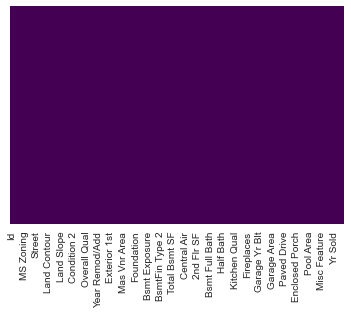

In [81]:
#To Check the missingvalues using heatmap
sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* All null values have been cleaned.

### To check Correlation

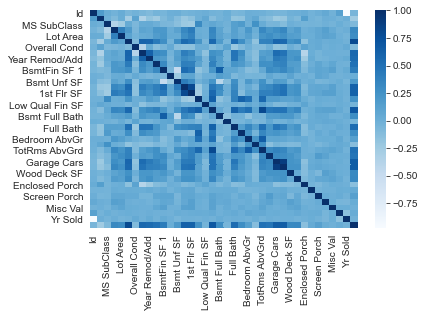

In [82]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train.corr(),cmap='Blues',annot=False) 

### Check for Data Types

In [85]:
#info Printed
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Convert Int to String ('Id', 'PID', MS SubClass)

In [86]:
#Int to str
int_to_string = ['Id', 'PID', 'MS SubClass']

for item in int_to_string:
    change_dtype(df_train, item, str)

#### Convert Month Int to Month Name

In [87]:
months = {1: 'January',
         2: 'February',
         3: 'March',
         4: 'April',
         5: 'May',
         6: 'June',
         7: 'July',
         8: 'August',
         9: 'September',
         10: 'October',
         11: 'November',
         12: 'December'}

change_dtype(df_train, 'Mo Sold', months)

In [88]:
#Checking again Numerical Values
df_train.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,...,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,2007.775719,181469.701609
std,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,...,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,1.312014,79258.659352
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,...,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129825.000000
50%,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000
75%,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,2010.000000,611657.000000


In [89]:
#Checkinh Head
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,March,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,April,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,January,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,April,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,March,2010,WD,138500


In [90]:
# Investigate any values that seem out of the orinary

df_train[df_train['SalePrice'] == df_train['SalePrice'].min()] # Quality is poor, seems to be okay

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1628,182,902207130,30,RM,68.0,9656,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,June,2010,WD,12789


In [93]:
#Categorical Values
categorical_vars = df_train.select_dtypes(exclude = ['number'])
categorical_vars.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Mo Sold', 'Sale Type'],
      dtype='object')

### Graphing Functions

In [ ]:
#Creating Scatter Plot
def create_scatter(df, x_col, y_col, title, x_label, y_label, marker_size = 4, color='mediumseagreen', plot_size = (10,6), hue = None):
    plt.figure(figsize=plot_size)
    ax = sns.scatterplot(x = x_col, y = y_col, data = df, s=marker_size, color=color, hue = hue)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;
    return ax

In [94]:
#Creating Histogram 
def create_hist(feature, num_bins, title, x_label, y_label, color='mediumseagreen', edgecolor='black', plot_size = (10,6)):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, edgecolor=edgecolor, grid = False)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [95]:
#Creating Bar-xticks
def create_bar_xticks(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'mediumseagreen', plot_size = (10,6), lw = 1.5, x_tick_labels = None, palette = None):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black', palette = palette)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    ax.set_xticklabels(x_tick_labels)
    plt.tight_layout;

In [96]:
#Creating Bar graph
def create_bar(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'mediumseagreen', plot_size = (10,6), lw = 1.5):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [97]:
#Creating Count
def create_count(df, x_col, title, x_label, color = 'mediumseagreen', plot_size = (10,6)):
    plt.figure(figsize = plot_size)
    sns.countplot(x=x_col, data = df, palette = 'viridis')
    plt.title(title, fontdict= {'fontsize':14})
    plt.xlabel(f'Number of {x_label} per Property', fontdict= {'fontsize':12})
    plt.ylabel('Number of Properties', fontdict= {'fontsize':12})

### Distributions of Variables

#### Target Sale Price

* Creating Related Distrubution Graphs

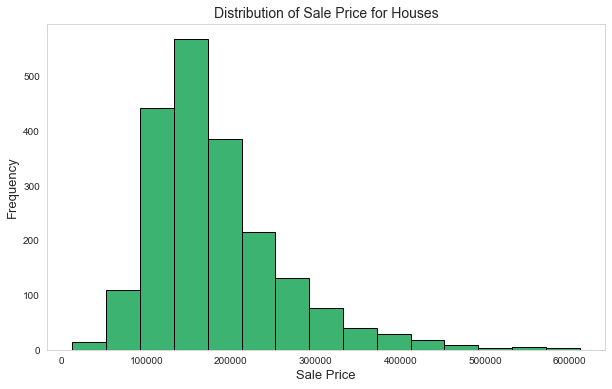

In [99]:
#Creating Histogram 
create_hist(df_train['SalePrice'], 
            num_bins = 15, 
            title = 'Distribution of Sale Price for Houses',
           x_label = 'Sale Price',
           y_label = 'Frequency')

### Visualizing Relationships between Categorical Features and Sale Price

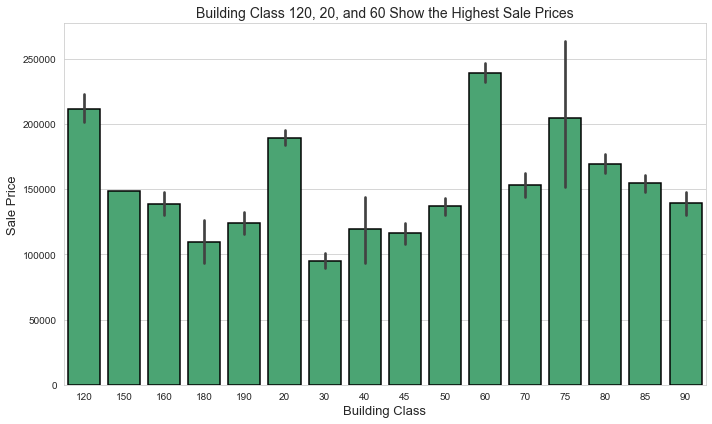

In [100]:
#Creating Bar under train dataset for MS Subclass and Saleprice
create_bar(df_train, 
          'MS SubClass', 
          'SalePrice', 
          title='Building Class 120, 20, and 60 Show the Highest Sale Prices', 
          x_label = 'Building Class', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

* In the above graph, we can see that Building Classes 120 (1-Story Planned Development Unit), 20 (1-Story 1946 and newer), and 60 (2-Story 1946 & Newer) result in significantly increased sale prices. These building classes might be important features for predicting the price of a building in Ames, Iowa

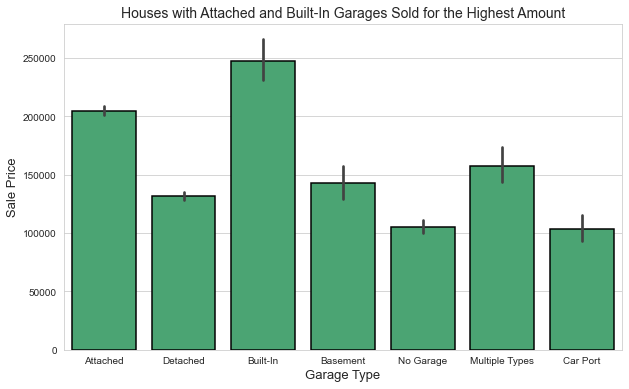

In [101]:
#Creating Bar xticks for saleprice and garbage
create_bar_xticks(df_train, 
                  'Garage Type', 
                  'SalePrice', 
                  title='Houses with Attached and Built-In Garages Sold for the Highest Amount', 
                  x_label = 'Garage Type', 
                  y_label = 'Sale Price', 
                  x_tick_labels =['Attached', 'Detached', 'Built-In', 'Basement', 'No Garage', 'Multiple Types', 'Car Port'])

* Houses with built-in garages had the highest sale prices. Built-in garages also have living space above them, so in addition to adding value through a garage, they can also add value through more liveable space.

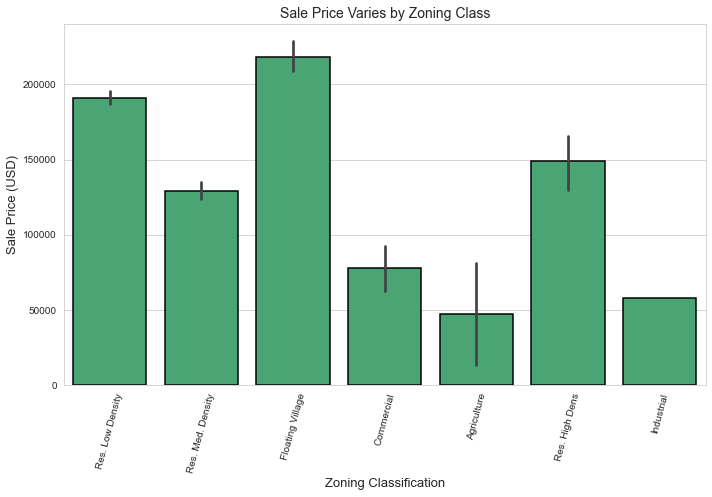

In [102]:
#Creating bar xticks for saleprice and MS zoning
create_bar_xticks(df_train, 
           'MS Zoning', 
           'SalePrice', 
            title='Sale Price Varies by Zoning Class', 
            x_label = 'Zoning Classification',
            y_label = 'Sale Price (USD)',
            x_tick_labels = ['Res. Low Density', 'Res. Med. Density', 'Floating Village', 'Commercial', 'Agriculture', 'Res. High Dens', 'Industrial'])
plt.tight_layout()
plt.xticks(rotation = 75);

* From this figure, we can see that Zoning Classification appears to result in vastly different sale prices. However, two similar levels appear.Grouping properties from Res. Low Density, Floating Villages, and Res. High Density areas together could be a could feature in predicting price.

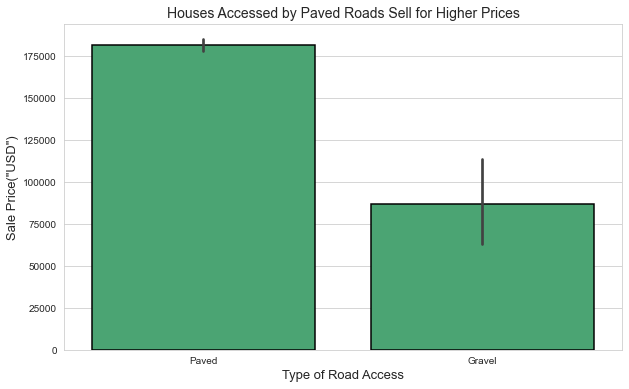

In [103]:
#Creating bar xticks for saleprice and street
create_bar_xticks(df_train, 
           'Street', 
           'SalePrice', 
            title='Houses Accessed by Paved Roads Sell for Higher Prices', 
            x_label = 'Type of Road Access',
            y_label = 'Sale Price("USD")',
            x_tick_labels = ['Paved', 'Gravel'])

* From this comparision graph, it appears that having access to the property via a paved road results in the house selling for a higher price than accessing the property via a gravel road.

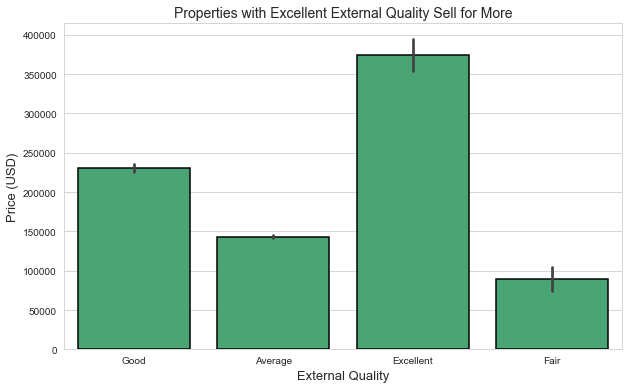

In [104]:
#Creating a bar xticks for extra quality and sale price
create_bar_xticks(df_train, 
           'Exter Qual', 
           'SalePrice', 
            title='Properties with Excellent External Quality Sell for More', 
            x_label = 'External Quality',
            y_label = 'Price (USD)',
            x_tick_labels = ['Good', 'Average', 'Excellent', 'Fair']
          )

* From this graph, it appears that the quality of the materials on the exterior of the house impacts price. 

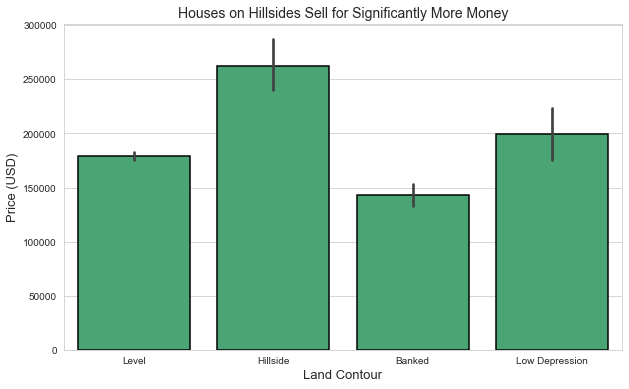

In [120]:
#Creating bar xticks for sale price and land
create_bar_xticks(df_train, 
           'Land Contour', 
           'SalePrice', 
            title='Houses on Hillsides Sell for Significantly More Money', 
            x_label = 'Land Contour',
            y_label = 'Price (USD)',
            x_tick_labels = ['Level', 'Hillside', 'Banked', 'Low Depression'])

* From the above graph, we can see that houses on the hillside sell for the good profit.

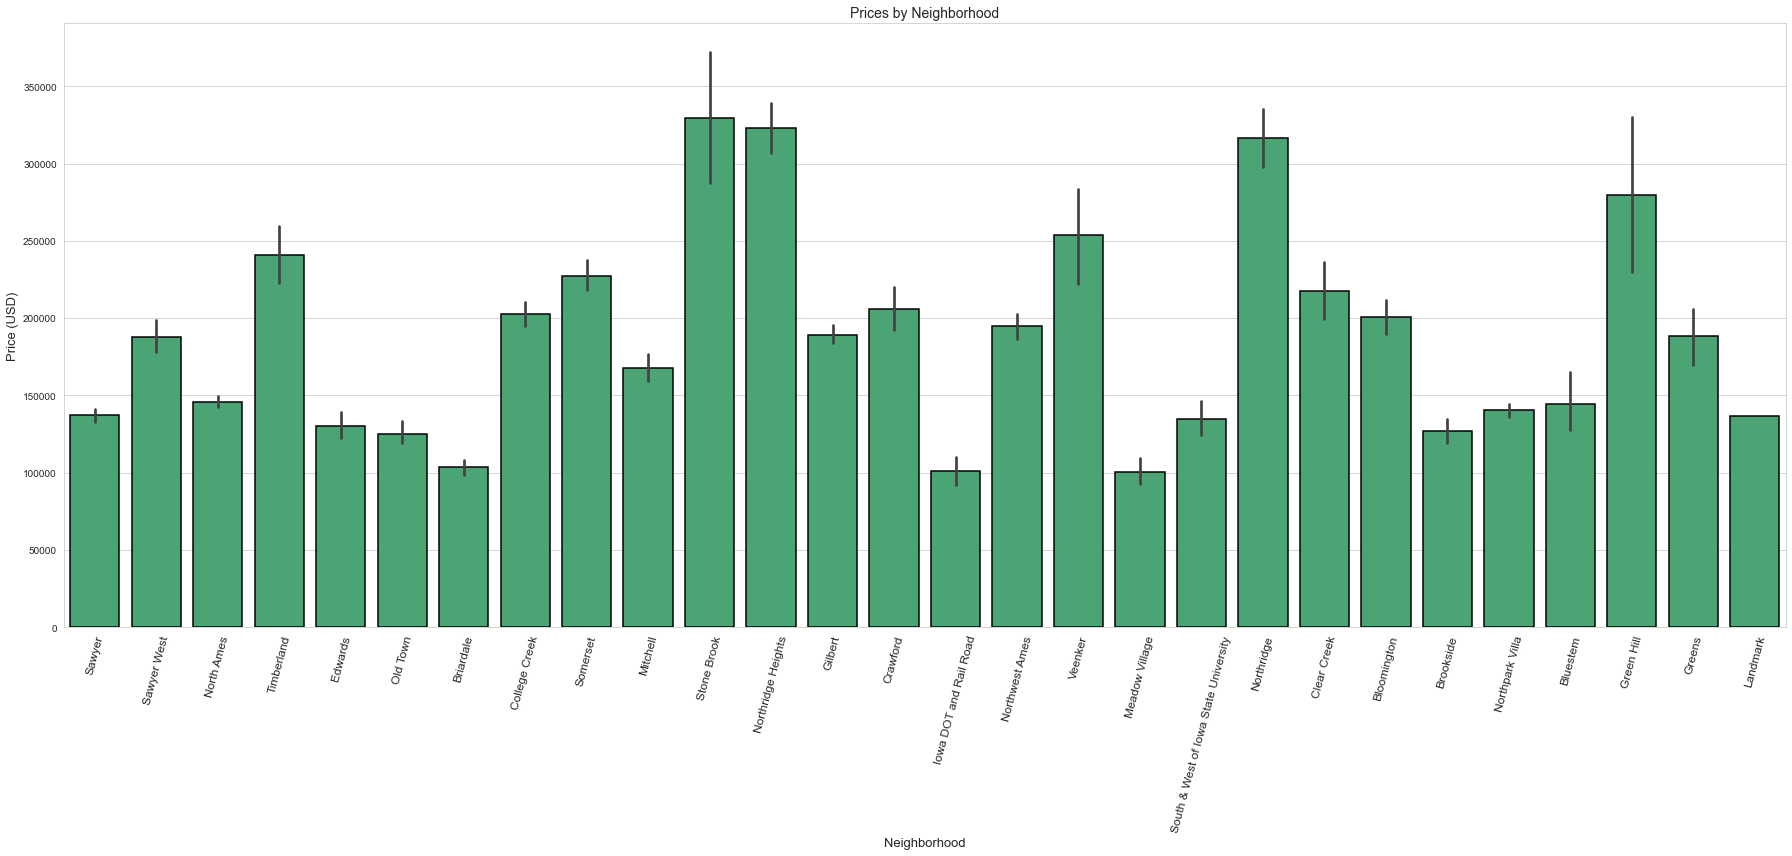

In [121]:
#Creating bar xticks graph for sale price and neighborhood

create_bar_xticks(df_train, 
           'Neighborhood', 
           'SalePrice', 
            title='Prices by Neighborhood', 
            x_label = 'Neighborhood',
            y_label = 'Price (USD)',
          plot_size = (25,12),
            x_tick_labels = ['Sawyer', 'Sawyer West', 'North Ames', 'Timberland', 'Edwards', 'Old Town', 'Briardale', 'College Creek', 'Somerset', 'Mitchell', 'Stone Brook', 'Northridge Heights', 'Gilbert', 'Crawford', 'Iowa DOT and Rail Road', 'Northwest Ames', 'Veenker', 'Meadow Village', 'South & West of Iowa State University', 'Northridge', 'Clear Creek', 'Bloomington', 'Brookside', 'Northpark Villa', 'Bluestem', 'Green Hill', 'Greens', 'Landmark'])
plt.xticks(size=12, rotation = 75)
plt.tight_layout();

Neighborhood definitely seems to impact the price of a property. However, creating dummy variables for each neighborhood will introduce too many features into our model. Because we seem to see three ranges of peaks in this figure, I will later engineer features to capture this variation.

* Group 1 - Stone Brook, Northridge Heights, Veenker, Northridge, Green Hill
* Group 2 - Sawyer West, Timber, College Creek, Somerset, Gilbert, Crawford, Northwest Ames, Cleark Creek, Bloomington, Greens
* Group 3 - All Others

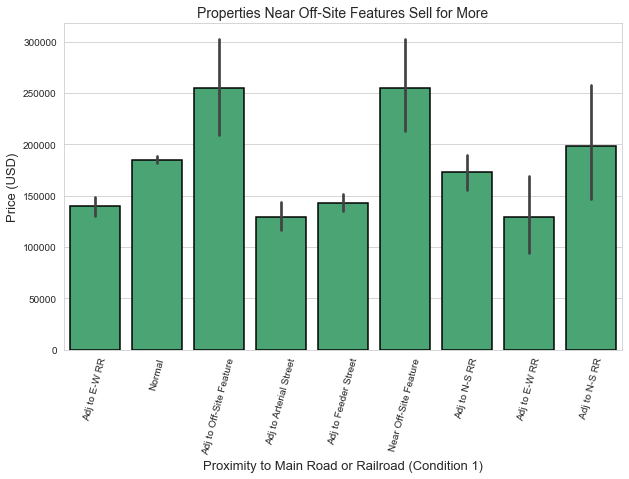

In [122]:
#Creating graph for saleprice and condition 1
create_bar_xticks(df_train, 
           'Condition 1', 
           'SalePrice', 
            title='Properties Near Off-Site Features Sell for More', 
            x_label = 'Proximity to Main Road or Railroad (Condition 1)',
            y_label = 'Price (USD)',
            x_tick_labels = ['Adj to E-W RR', 'Normal', 'Adj to Off-Site Feature', 'Adj to Arterial Street', 'Adj to Feeder Street', 'Near Off-Site Feature', 'Adj to N-S RR', 'Adj to E-W RR', ' Adj to N-S RR'],
            )
plt.xticks(rotation = 75);

* From this graph, we are able to see that Sale Prices increase if the property is near a positive off-site feature. Likewise, prices are less if the property is near an arterial or feeder street.

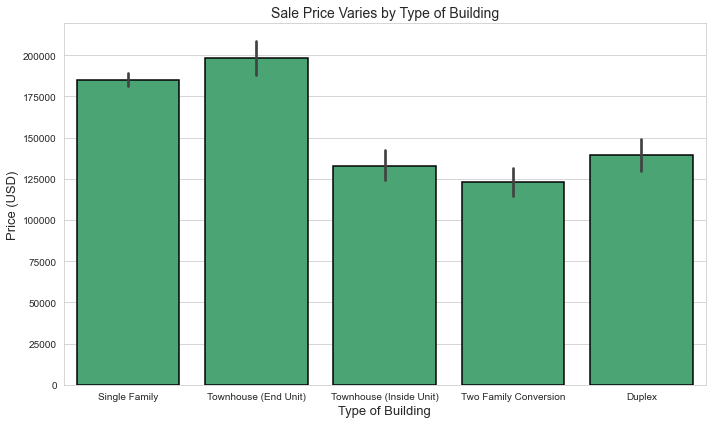

In [123]:
#Creating a graph for sale price and building type
create_bar_xticks(df_train, 
           'Bldg Type', 
           'SalePrice', 
            title='Sale Price Varies by Type of Building', 
            x_label = 'Type of Building',
            y_label = 'Price (USD)',
            x_tick_labels = ['Single Family', 'Townhouse (End Unit)', 'Townhouse (Inside Unit)', 'Two Family Conversion', 'Duplex'])
plt.tight_layout()

* From this graph, we can see that single family homes and townhouses that are end units sell for the most money.

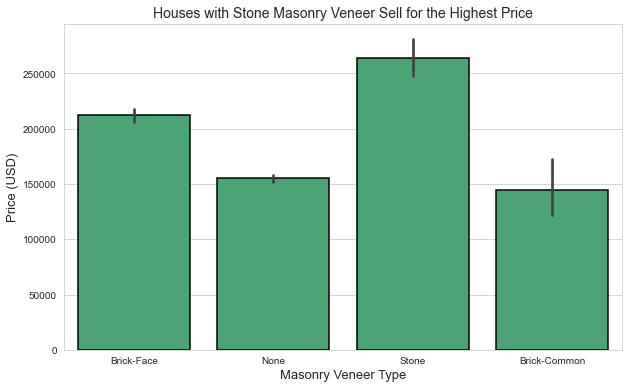

In [124]:
#musonry venner sell and sale price graph
create_bar_xticks(df_train, 
           'Mas Vnr Type', 
           'SalePrice', 
            title='Houses with Stone Masonry Veneer Sell for the Highest Price', 
            x_label = 'Masonry Veneer Type',
            y_label = 'Price (USD)',
          x_tick_labels = ['Brick-Face', 'None', 'Stone', 'Brick-Common'])

* From this graph, it appears that houses with stone veneers sell for substantially more.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

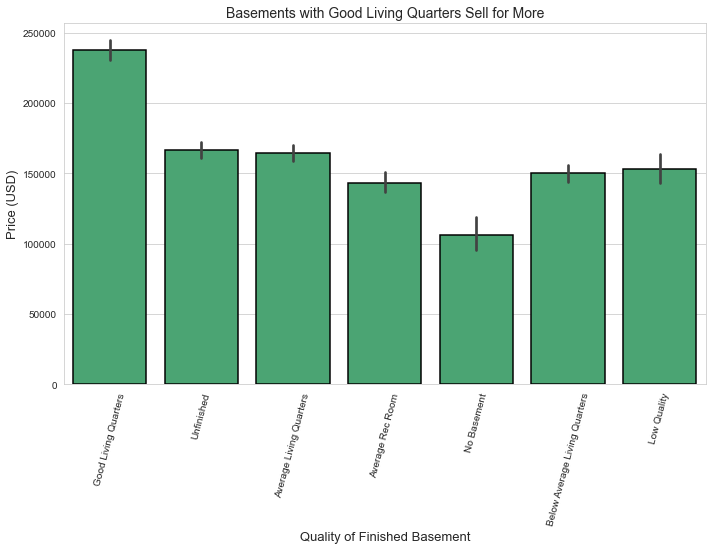

In [125]:
# Creating a  graph betwwen sale price and Basements
create_bar_xticks(df_train, 
           'BsmtFin Type 1', 
           'SalePrice', 
            title='Basements with Good Living Quarters Sell for More', 
            x_label = 'Quality of Finished Basement',
            y_label = 'Price (USD)',
            x_tick_labels = ['Good Living Quarters', 'Unfinished', 'Average Living Quarters', 'Average Rec Room', 'No Basement', 'Below Average Living Quarters', 'Low Quality'])
plt.tight_layout();
plt.xticks(rotation=75)

* In this graph, we see that houses with basements with good living quarters sell for the highest price, while variation is smallerr between the other qualities.

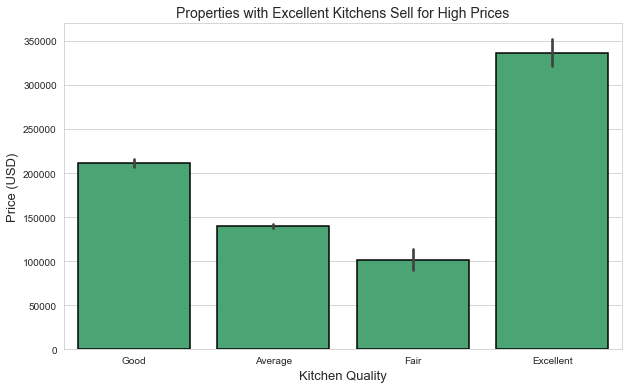

In [126]:
# Creating a graph for sale price and kitchen
create_bar_xticks(df_train, 
           'Kitchen Qual', 
           'SalePrice', 
            title='Properties with Excellent Kitchens Sell for High Prices', 
            x_label = 'Kitchen Quality',
            y_label = 'Price (USD)',
            x_tick_labels = ['Good', 'Average', 'Fair', 'Excellent'])

* In this graph, we see that houses with excellent quality kitchens sell for more.

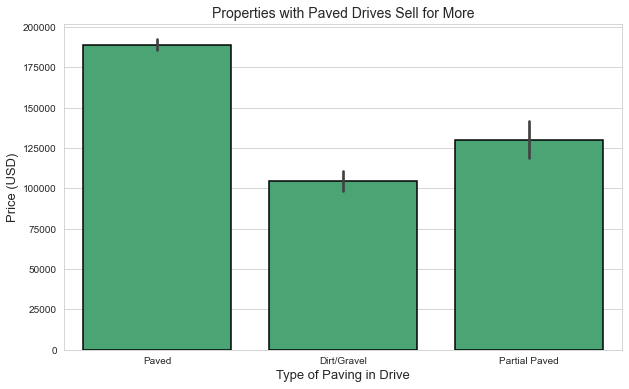

In [127]:
# Creating a graph for paved drive and sale price
create_bar_xticks(df_train, 
           'Paved Drive', 
           'SalePrice', 
            title='Properties with Paved Drives Sell for More', 
            x_label = 'Type of Paving in Drive',
            y_label = 'Price (USD)',
            x_tick_labels = ['Paved', 'Dirt/Gravel', 'Partial Paved'])

* Properties with paved access sell for substantially more.

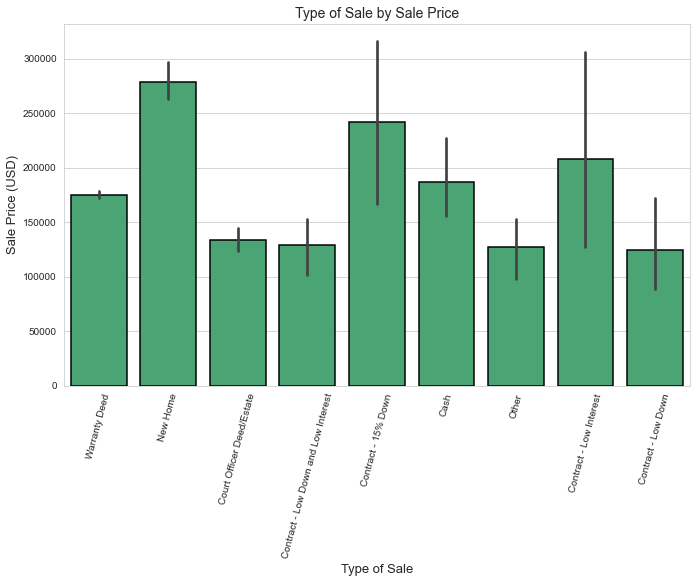

In [129]:
# Creating a graph under sale price and type of sale
create_bar_xticks(df_train, 
           'Sale Type', 
           'SalePrice', 
            title='Type of Sale by Sale Price', 
            x_label = 'Type of Sale',
            y_label = 'Sale Price (USD)',
            x_tick_labels = ['Warranty Deed', 'New Home', 'Court Officer Deed/Estate', 'Contract - Low Down and Low Interest','Contract - 15% Down', 'Cash', 'Other', 'Contract - Low Interest', 'Contract - Low Down'])
plt.tight_layout()
plt.xticks(rotation = 75);

* From this figure, we can see that New Homes sell for the most.

### Feature Engineering

#### Combining Train dataset and Test Dataset to ensure equal features

In [183]:
#TRain dataset features
Train_features = len(df_train)
#printing
Train_features

2051

In [184]:
#Concating test and train datasets
df_train_and_test = pd.concat(objs=[df_train,df_test], axis = 0)

#Printing head
df_train_and_test.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,garage_area_car_int
0,109,533352170,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,March,2010,WD,130500.0,950.0
1,544,531379050,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,April,2009,WD,220000.0,1118.0
2,153,535304180,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,January,2010,WD,109000.0,246.0
3,318,916386060,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,April,2010,WD,174000.0,800.0
4,255,906425045,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,March,2010,WD,138500.0,968.0


In [185]:
#Explore if a 'Garage' Feature Can Be Built
df_train_and_test.columns[df_train_and_test.columns.str.contains('Garage')]

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [186]:
# Correlation of Garage Area with Sale Price (Training Data Only)
df_train.corr()['Garage Area']['SalePrice']

0.649896849661898

In [187]:
# Correlation of Garage Cars with Sale Price (Training Data Only)
df_train.corr()['Garage Cars']['SalePrice']

0.6477813459587413

In [188]:
# Correlation between Garage Area and Garage Cars
df_train.corr()['Garage Area']['Garage Cars']

0.8934415694476694

* Because the area of the garage and the number of cars that a garage can fit are highly correlated, I will create an interaction feature to account for this relationship

In [189]:
df_train['garage_area_car_int'] = df_train['Garage Area'] * df_train['Garage Cars']

In [190]:
#Added new column
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,garage_area_car_int
0,109,533352170,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,March,2010,WD,130500,950.0
1,544,531379050,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,April,2009,WD,220000,1118.0
2,153,535304180,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,January,2010,WD,109000,246.0
3,318,916386060,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,April,2010,WD,174000,800.0
4,255,906425045,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,March,2010,WD,138500,968.0


In [191]:
#Added new colmun under concated train and test dataset
df_train_and_test['garage_area_car_int'] = df_train_and_test['Garage Area'] * df_train_and_test['Garage Cars']

df_train_and_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,garage_area_car_int
0,109,533352170,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,March,2010,WD,130500.0,950.0
1,544,531379050,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,April,2009,WD,220000.0,1118.0
2,153,535304180,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,January,2010,WD,109000.0,246.0
3,318,916386060,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,April,2010,WD,174000.0,800.0
4,255,906425045,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,March,2010,WD,138500.0,968.0


In [192]:
def create_total_baths(df):
    df['total_baths'] = df['Full Bath'] + df['Bsmt Full Bath'] + 0.5 * (df['Bsmt Half Bath'] + df['Half Bath'])

In [193]:
def drop_baths_columns(df):
    '''
    Drops columns used to create "Total Baths" feature
    '''
    df.drop(columns = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Full Bath'], inplace = True)

In [194]:
def create_liveable_sf(df):
    df['liveable_sf'] = df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Gr Liv Area']

In [195]:
def drop_liveable_sf_columns(df):
    '''
    Drops all columns directly related to "Liveable SF" feature
    '''
    df.drop(columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Gr Liv Area', '1st Flr SF', '2nd Flr SF'], inplace = True)

In [196]:
create_total_baths(df_train_and_test)
drop_baths_columns(df_train_and_test)

In [197]:
create_liveable_sf(df_train_and_test)
drop_liveable_sf_columns(df_train_and_test)

### As per bar graphs comparision

#### Create Two Neighborhood Features Based on Clusters from Bar Plot

* In the bar plot of Average Sale Price by Neighborhood, I noticed about three clusters of neighborhoods with sale prices that were in a similar range. To eliminate adding a dummy variable for each individual neighborhood, I will create two dummy variables to encode inclusion in these clusters.

In [198]:
#mapping as per barplot under neighborhood plot for train and test datasets
group1 = ['StoneBr', 'NridgeHt', 'Veenker', 'NoRidge', 'GrnHill']
group2 = ['SawyerW', 'CollgCr', 'Somerst', 'Gilbert', 'Crawfor', 'NAmes', 'ClearCr', 'Blmngtn', 'Greens']

df_train_and_test['neighborhoods_1'] = df_train_and_test['Neighborhood'].map(lambda name: 1 if name in group1 else 0)
df_train_and_test['neighborhoods_2'] = df_train_and_test['Neighborhood'].map(lambda name: 1 if name in group2 else 0)

#Droping column Neighborhood
df_train_and_test.drop(columns = 'Neighborhood', inplace = True)

#### Create Three Building Class Features
* From the bar graph showing average sale prices by MS SubClass, noticed that three classes seemed to be distinguishing features. 

In [199]:
#mapping as per barplot under MS Subclass plot for train and test datasets
df_train_and_test['SubClass20'] = df_train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 20 else 0)
df_train_and_test['SubClass60'] = df_train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 60 else 0)
df_train_and_test['SubClass120'] = df_train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 120 else 0)

#Dropping column MS subclass
df_train_and_test.drop(columns = 'MS SubClass', inplace = True)

#### Create a feature to represent if a property is close to an off-site feature or an arterial or feeder street
* During EDA, noticed that proximity to a positive off-site feature or proximity to a busy street seemed to distinguishing categories for Sale Price.

In [200]:
#mapping as per barplot under Condition 1 plot for train and test datasets
df_train_and_test['close_to_offsite_feature'] = df_train_and_test['Condition 1'].map(lambda x: 1 if x in ['PosN', 'PosA'] else 0)
df_train_and_test['close_to_busy_street'] = df_train_and_test['Condition 1'].map(lambda x: 1 if x in ['Artery', 'Feedr'] else 0)

#Dropping condition 1
df_train_and_test.drop(columns = 'Condition 1', inplace = True)

#### Create a feature to determine if masonry veneer type is stone
* During EDA, stone masonry veneer types were discovered to sell for more.

In [201]:
#mapping as per barplot under Mas Vnr Type plot for train and test datasets
df_train_and_test['stone_veneer'] = df_train_and_test['Mas Vnr Type'].map(lambda x: 1 if x == 'Stone' else 0)

#dropping Mas Vnr Type
df_train_and_test.drop(columns = 'Mas Vnr Type', inplace = True)

#### Create a feature to code if the type of sale is for a new home
* New homes typically sold for more, so a dummy variable can be create for this feature.

In [202]:
#mapping as per barplot under sale Type plot for train and test datasets
df_train_and_test['new_sale'] = df_train_and_test['Sale Type'].map(lambda x: 1 if x == 'New' else 0)
#mapping as per barplot under sale Type plot for train and test datasets
df_train_and_test['estate'] = df_train_and_test['Sale Type'].map(lambda x: 1 if x == 'COD' else 0)

#Cropping sale type
df_train_and_test.drop(columns = 'Sale Type', inplace = True)

#### Create a feature to denote good living quarters in the basement
* EDA revealed that homes with good basement living quarters sell for more.

In [203]:
#mapping as per barplot under Basement Type plot for train and test datasets
df_train_and_test['good_basement'] = df_train_and_test['BsmtFin Type 1'].map(lambda x: 1 if x == 'GLQ' else 0)

#Dropping basement
df_train_and_test.drop(columns = 'BsmtFin Type 1', inplace = True)

#### Create a feature to denote excellent or good kitchen quality
* EDA revealed that homes with excellent kitchens sell for more.

In [204]:
#mapping as per barplot under kitchen quality  plot for train and test datasets
df_train_and_test['excellent_kitchen'] = df_train_and_test['Kitchen Qual'].map(lambda x: 1 if x == 'Ex' else 0)

#dropping kitchen
df_train_and_test.drop(columns = 'Kitchen Qual', inplace = True)

#### Create a column to denote zoning clusters
* The 'FV', 'RL', and 'RH' zoning classes appeared to be similar based on Sale Price so were clustered together.

In [205]:
#mapping as per barplot under zoining plot for train and test datasets
df_train_and_test['zoning_cluster_1'] = df_train_and_test['MS Zoning'].map(lambda x: 1 if x in ['FV', 'RL', 'RH'] else 0)

#dropping zoining
df_train_and_test.drop(columns = 'MS Zoning', inplace = True)

In [206]:
#Check the data
df_train_and_test.head()

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,SubClass60,SubClass120,close_to_offsite_feature,close_to_busy_street,stone_veneer,new_sale,estate,good_basement,excellent_kitchen,zoning_cluster_1
0,109,533352170,69.0552,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,0,1,0,1
1,544,531379050,43.0000,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,0,1,0,1
2,153,535304180,68.0000,7922,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,0,1
3,318,916386060,73.0000,9802,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,82.0000,14235,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,1


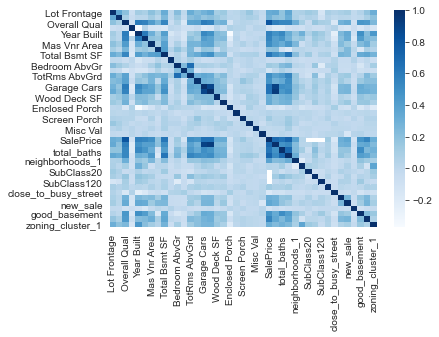

In [207]:
# check for correlation
plt.figure(figsize=(6,4))
sns.heatmap(df_train_and_test.corr(),cmap='Blues',annot=False) 

### Model Training Starts

#### Create dummy variables for categorical features of interest identified in EDA

In [263]:
# Drop features that have already been coded
# Dummify hand-selected features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn. model_selection import cross_val_score

dummy_list = ['Street', 'Land Contour', 'Bldg Type', 'Garage Type', 'Exter Qual', 'Paved Drive']

In [264]:
#Dropping dummy list columns and aasigned to a variable
df_train_and_test_dummies = pd.get_dummies(data = df_train_and_test, columns = dummy_list, drop_first = True)

#### Train split data

In [265]:
#Splitting the train and test features by len of dataset and good dataset after dropping dummies
# Split into Train
train_preprocessed = df_train_and_test_dummies[:Train_features]

# Split into Test
test_preprocessed = df_train_and_test_dummies[Train_features:]

In [267]:
#unnessary Columns need to be dropped 
cols_to_drop = ['Id', 'PID', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 2', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 2', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'SalePrice', 'Alley', 'Lot Shape','Foundation', 'Mo Sold', 'Low Qual Fin SF', 'Roof Matl']

#Assigning X and y feaures and then next step to split these features to test and train 
X = train_preprocessed.drop(columns = cols_to_drop)
y = np.log(train_preprocessed['SalePrice']) # log y to normalize distribution!


In [311]:
#Split features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### X_train

In [312]:
#Printing X_train
X_train

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,TotRms AbvGrd,Garage Cars,...,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Paved Drive_P,Paved Drive_Y
1448,47.0000,6904,6,5,2005,2005,240.0,522.0,6,2.0,...,0,0,0,0,0,0,1,0,0,1
1771,110.0000,14226,8,5,2006,2006,375.0,1935.0,9,3.0,...,0,0,0,0,0,0,1,0,0,1
966,69.0552,15957,6,6,1977,1977,0.0,96.0,6,2.0,...,0,0,0,0,0,0,0,1,0,1
1604,93.0000,12090,8,5,1998,1998,650.0,1141.0,10,2.0,...,0,1,0,0,0,0,1,0,0,1
1827,80.0000,9600,6,7,1976,1994,360.0,528.0,7,2.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,82.0000,9709,8,5,2007,2007,120.0,140.0,8,3.0,...,0,1,0,0,0,0,0,0,0,1
1095,72.0000,9000,6,5,1956,1956,74.0,580.0,6,1.0,...,0,0,0,0,0,0,0,1,0,1
1130,78.0000,10140,6,6,1974,1999,99.0,0.0,5,2.0,...,0,0,0,0,0,0,0,1,0,1
1294,21.0000,1869,6,6,1970,1970,127.0,162.0,5,1.0,...,0,0,0,1,0,0,0,1,0,1


#### X_test

In [313]:
# Printing X_test
X_test

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,TotRms AbvGrd,Garage Cars,...,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Paved Drive_P,Paved Drive_Y
1124,55.0000,10780,5,5,1976,1976,0.0,428.0,6,2.0,...,0,0,0,1,0,0,0,1,0,1
188,88.0000,14200,7,6,1966,1966,309.0,479.0,8,2.0,...,0,0,0,0,0,0,0,1,0,1
1727,74.0000,8899,8,5,2007,2007,108.0,908.0,10,3.0,...,0,1,0,0,0,0,0,0,0,1
1658,66.0000,6858,6,4,1915,1950,0.0,806.0,6,1.0,...,0,0,0,1,0,0,0,1,0,1
1424,74.0000,8581,7,5,2006,2006,0.0,851.0,7,2.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,69.0552,8145,7,6,1940,1950,0.0,674.0,13,2.0,...,0,0,0,1,0,0,0,1,0,1
692,60.0000,8520,3,5,1916,1950,0.0,216.0,6,0.0,...,0,0,0,0,1,0,0,1,0,0
706,93.0000,12030,8,5,2007,2007,254.0,1694.0,7,3.0,...,0,0,0,0,0,0,0,0,0,1
1525,53.0000,3982,8,5,2006,2006,0.0,366.0,7,3.0,...,0,0,0,0,0,0,1,0,0,1


#### y_train

In [314]:
#printing y_train
y_train

1448    12.269047
1771    12.886641
966     12.144197
1604    12.460715
1827    12.138864
          ...    
1724    12.674513
1095    11.842229
1130    12.106252
1294    11.571194
860     12.367341
Name: SalePrice, Length: 1640, dtype: float64

#### y_test

In [315]:
#Printing y_test
y_test

1124    11.794338
188     12.328290
1727    12.429216
1658    11.759786
1424    12.221749
          ...    
1791    12.230765
692     11.264464
706     12.669807
1525    12.485827
1421    12.735965
Name: SalePrice, Length: 411, dtype: float64

In [318]:
#Test preprocessed data after dropping columns
test_data = test_preprocessed.drop(columns = cols_to_drop)

#### Linear Regression model implementing

In [319]:
#model
LinearRegression_model = LinearRegression()

In [320]:
#Model fitting into X and y features
LinearRegression_model.fit(X_train, y_train);

* Hence model is fitted after long EDA part

In [321]:
#Calculating Score function
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test),4)}.')

#### What is cross_val_score?
Cross-validation is a statistical method used to estimate the skill of machine learning models.
By default cross_val_score uses the scoring provided in the given estimator, which is usually the simplest appropriate scoring method.

#### How to calculate cross_val_score?
"cross_val_score" splits the data into say 5 folds. Then for each fold it fits the data on 4 folds and scores the 5th fold. Then it gives you the 5 scores from which you can calculate a mean and variance for the score. You crossval to tune parameters and get an estimate of the score




In [322]:
#Calculating scores
display_R2_scores(LinearRegression_model, X_train, y_train, X_test, y_test)
print(f'The number of features in this model is : {np.sum(LinearRegression_model.coef_ != 0)}.')

The mean cross validation score for this model is 0.8448.
The training score for this model is 0.8745.
The testing score for this model is 0.8783.
The number of features in this model is : 47.


In [323]:
# y was logged; Must exponentiate the predictions
LinearRegression_prediction = np.exp(LinearRegression_model.predict(test_data))
#Printing Prediction
LinearRegression_prediction

array([151810.47115041, 157635.43689747, 222853.30124565, 108306.77227949,
       165705.74007685, 102396.88837527, 105627.15391974, 143643.89484764,
       175843.92451522, 167341.79151175, 165918.80395162, 131016.60110583,
       146669.60246289, 300931.9828861 , 147682.42258303, 118642.31338318,
       142357.2889436 , 123288.77904654, 206172.32335823, 185793.93738056,
       153352.45513855, 125415.32599341, 190116.89660305, 153413.82647517,
       184089.90083461, 125802.62223279, 115469.19352873, 109081.82194776,
       157665.09192478,  70856.07353629, 106730.05351863,  98290.66616201,
       200822.28122251, 153637.92260959, 200712.52232701, 184539.51649236,
       107047.32711636,  87917.59087821, 132536.25226182, 168050.97876149,
       157196.61292986, 216628.14752095, 151530.50884408, 141453.94716382,
       206079.41198756,  92407.07710885, 218347.00116162, 125432.87454507,
       135643.8386878 , 122143.87884719, 108178.43027165, 188916.5610799 ,
       244228.91552192, 1

In [324]:
y_test = np.exp(y_test) # Convert back to actual (non-log) values
y_pred = np.exp(LinearRegression_model.predict(X_test)) # Convert back to actual (non-log) values
resids = y_test - y_pred
resids

1124     2400.954174
188     16592.377774
1727   -14189.432089
1658     8363.252105
1424    -1878.936113
            ...     
1791   -10614.992739
692     24140.184975
706     70771.359814
1525   -19948.018077
1421    21872.573250
Name: SalePrice, Length: 411, dtype: float64

In [325]:
#Calculating RMSE
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The RMSE is {round(rmse,2)}.')

The RMSE is 23625.19.


#### Plotting 

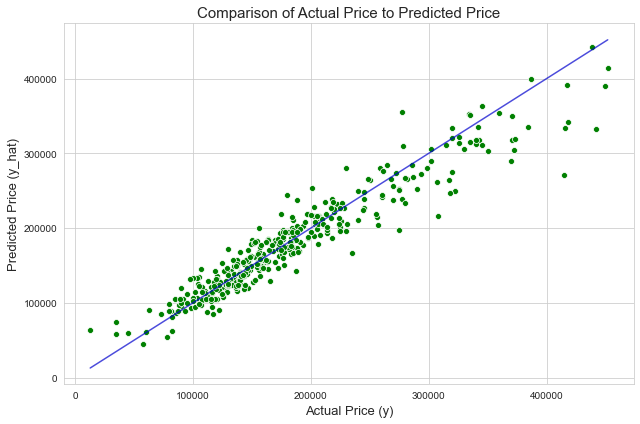

In [245]:
#Scatter Plot
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = y_pred, color = 'green')
plt.title('Comparison of Actual Price to Predicted Price', fontdict = {'fontsize':15})
maxDist = max(max(y_pred), max(y_test)) # Code from Mahdi's lecture
minDist = min(min(y_pred), min(y_test)) # Code from Mahdi's lecture
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7) # Similar to Mahdi's code, but done with Seaborn
plt.xlabel('Actual Price (y)', fontdict= {'fontsize':13})
plt.ylabel('Predicted Price (y_hat)', fontdict= {'fontsize':13})
plt.tight_layout();

* From this plot, we are able to see that this model does not perform equally well at predicing all prices. Specifically, the model seems to be good at predicing the price of properties within the range of 90,000 to 225,000, but it does not do a good job at either extreme. In the original testing data set, 75% of the houses were priced at or under 214,000. The model might not perform well at extreme values due to insufficient training data for these cases.

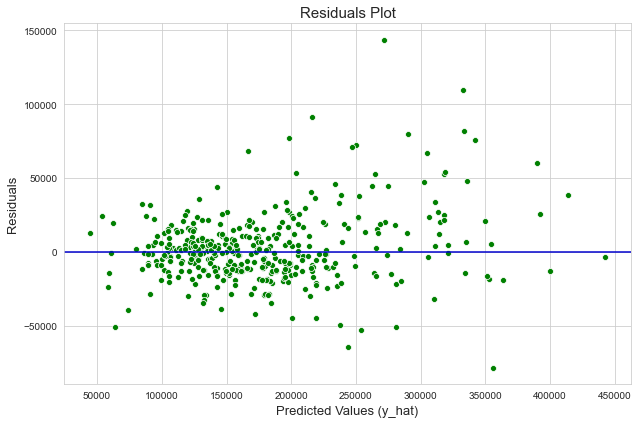

In [328]:
#Residence Plot
plt.figure(figsize=(9,6))
sns.scatterplot(x = y_pred, y = resids, color = 'green')
plt.axhline(0, color = 'mediumblue')
plt.title('Residuals Plot', fontdict = {'fontsize':15})
plt.xlabel('Predicted Values (y_hat)', fontdict = {'fontsize':13})
plt.ylabel('Residuals', fontdict = {'fontsize':13})
plt.tight_layout();

* The poor performance of the model at predicting values less than 90,000 and greater than 225,000 is further amplified by this plot. The residuals increase at the more extreme predicted values.Because this plot appears to have a fan shape, it is indicative that this model did not have equality of variance between features. In EDA, I discovered that both the target (Sale Price) and most features were not normally distributed. To build the model, the Sale Price was log-transformed, but none of the features were transformed. Before deploying the model, we might consider log-transforming some of the features, too

#### Distribution of Residuals

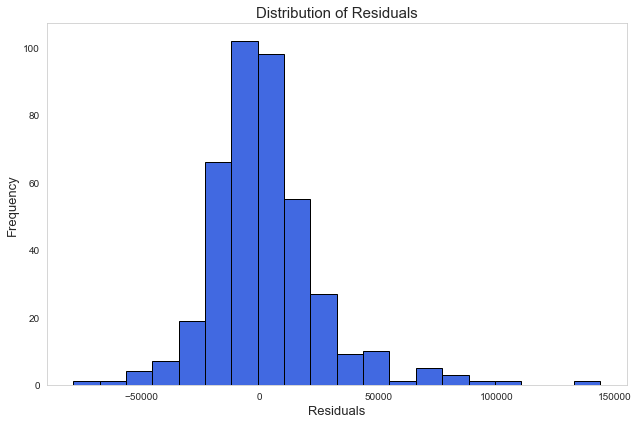

In [330]:
#Histogram of residuals
resids.hist(bins = 20, figsize = (9,6), edgecolor = 'black', grid = False, color = 'royalblue')
plt.title('Distribution of Residuals', fontdict = {'fontsize':15})
plt.xlabel('Residuals', fontdict = {'fontsize':13})
plt.ylabel('Frequency', fontdict = {'fontsize':13})
plt.tight_layout();